In [5]:
from prophet import Prophet
import pandas as pd

In [6]:
d=pd.read_csv(r"C:\Users\prernagupta\Desktop\jeans-bf\bfjeans.csv")


In [7]:
d

,TREND,BASE,ds,y,NSI,FSI_YHAT_LOWER,FSI_YHAT,FSI_YHAT_UPPER,NSI_YHAT_LOWER,NSI_YHAT,...,CATWALK_IMPACT,FSI_PIVOT_POINTS,NSI_PIVOT_POINTS,CREATED_AT,CREATED_BY,LEVELS,REGION,INNOVATOR_SMOOTHED_DATA,MASS_SMOOTHED_DATA,CONSERVATIVE_SMOOTHED_DATA
0,Boyfriend Jeans Uk,Jeans,02/01/2017,0.070035,0.088749,0.068315,0.073266,0.078057,0.048602,0.067274,...,0.0,"['2017-09-18', '2019-03-11', '2020-08-03']","['2019-01-14', '2019-11-04']",39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
1,Boyfriend Jeans Uk,Jeans,09/01/2017,0.068526,0.083456,0.068599,0.073579,0.078358,0.049568,0.068605,...,0.0,"['2017-09-18', '2019-03-11', '2020-08-03']","['2019-01-14', '2019-11-04']",39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
2,Boyfriend Jeans Uk,Jeans,16/01/2017,0.068272,0.079924,0.068861,0.073898,0.078420,0.051044,0.069151,...,0.0,"['2017-09-18', '2019-03-11', '2020-08-03']","['2019-01-14', '2019-11-04']",39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
3,Boyfriend Jeans Uk,Jeans,23/01/2017,0.069916,0.077928,0.069267,0.074168,0.078950,0.051849,0.069084,...,0.0,"['2017-09-18', '2019-03-11', '2020-08-03']","['2019-01-14', '2019-11-04']",39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
4,Boyfriend Jeans Uk,Jeans,30/01/2017,0.069978,0.077240,0.069164,0.074359,0.079222,0.050181,0.068666,...,0.0,"['2017-09-18', '2019-03-11', '2020-08-03']","['2019-01-14', '2019-11-04']",39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Boyfriend Jeans Uk,Jeans,09/10/2023,NaN,NaN,0.121073,0.135268,0.148726,0.071758,0.091546,...,NaN,"['2017-09-18', '2019-03-11', '2020-08-03']","['2019-01-14', '2019-11-04']",39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
354,Boyfriend Jeans Uk,Jeans,16/10/2023,NaN,NaN,0.122208,0.135818,0.149575,0.071420,0.091783,...,NaN,"['2017-09-18', '2019-03-11', '2020-08-03']","['2019-01-14', '2019-11-04']",39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
355,Boyfriend Jeans Uk,Jeans,23/10/2023,NaN,NaN,0.121638,0.136477,0.149898,0.070925,0.091653,...,NaN,"['2017-09-18', '2019-03-11', '2020-08-03']","['2019-01-14', '2019-11-04']",39:04.2,camillereyes,Style,UK,NaN,NaN,NaN
356,Boyfriend Jeans Uk,Jeans,30/10/2023,NaN,NaN,0.122991,0.137082,0.150890,0.071581,0.091361,...,NaN,"['2017-09-18', '2019-03-11', '2020-08-03']","['2019-01-14', '2019-11-04']",39:04.2,camillereyes,Style,UK,NaN,NaN,NaN


In [4]:
d=d.iloc[:, [2,3]]
df=d.dropna()
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

<ipython-input-4-6423561573a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']= pd.to_datetime(df['ds'])


In [74]:
df

,ds,y
0,2017-02-01,0.070035
1,2017-09-01,0.068526
2,2017-01-16,0.068272
3,2017-01-23,0.069916
4,2017-01-30,0.069978
...,...,...
251,2021-10-25,0.093514
252,2021-01-11,0.081337
253,2021-08-11,0.076908
254,2021-11-15,0.085671


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


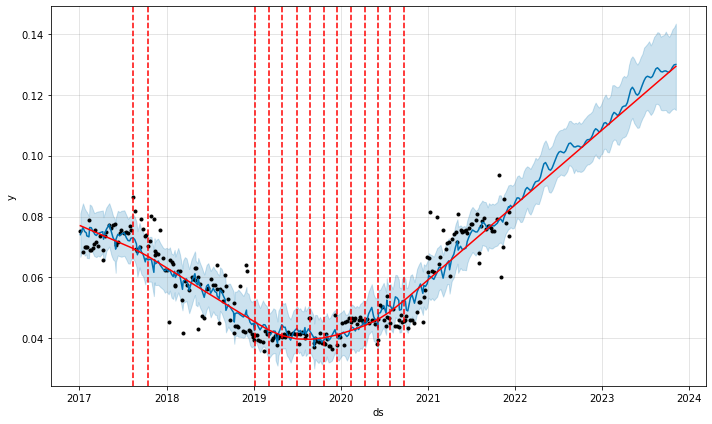

In [76]:

from prophet.plot import add_changepoints_to_plot
m = Prophet(yearly_seasonality=True, changepoint_range=0.8 ,changepoint_prior_scale=0.05)
# define the model
# fit the model
m.fit(df)
future = m.make_future_dataframe(periods=100, freq='W')
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

INFO:prophet:Making 4 forecasts with cutoffs between 2019-06-16 00:00:00 and 2020-12-07 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

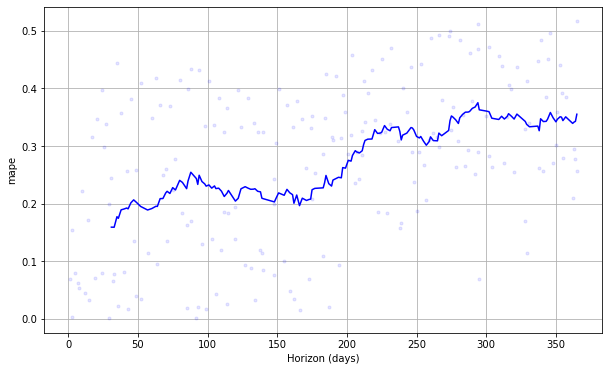

In [7]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [8]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,31 days,0.000116,0.010764,0.008045,0.159091,0.116727,0.179342,0.500
1,32 days,0.000116,0.010775,0.008081,0.158983,0.116727,0.179227,0.500
2,33 days,0.000116,0.010749,0.008086,0.158972,0.078849,0.179344,0.525
3,35 days,0.000179,0.013395,0.009713,0.177228,0.125362,0.204203,0.500
4,36 days,0.000179,0.013367,0.009560,0.174404,0.125362,0.201231,0.500


In [8]:
q=d

In [9]:
q=q.iloc[:, [2,3,11,12,14]]

In [10]:
q

,ds,y,FRESHNESS_INDEX,MARKDOWN_INDEX,TRENDING_INDEX
0,02/01/2017,0.070035,-0.069948,1.093541,1.202601
1,09/01/2017,0.068526,-0.036821,1.085473,1.209353
2,16/01/2017,0.068272,-0.003930,1.077660,1.214613
3,23/01/2017,0.069916,0.028726,1.070104,1.218381
4,30/01/2017,0.069978,0.061147,1.062804,1.220657
...,...,...,...,...,...
353,09/10/2023,NaN,0.532241,1.080473,0.769744
354,16/10/2023,NaN,0.548298,1.082710,0.794582
355,23/10/2023,NaN,0.564093,1.088916,0.809744
356,30/10/2023,NaN,0.565471,1.097828,0.820340


In [11]:
q['ds']= pd.to_datetime(q['ds'])

<ipython-input-11-3511fa8656bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q['ds']= pd.to_datetime(q['ds'])


In [12]:
q

,ds,y,FRESHNESS_INDEX,MARKDOWN_INDEX,TRENDING_INDEX
0,2017-02-01,0.070035,-0.069948,1.093541,1.202601
1,2017-09-01,0.068526,-0.036821,1.085473,1.209353
2,2017-01-16,0.068272,-0.003930,1.077660,1.214613
3,2017-01-23,0.069916,0.028726,1.070104,1.218381
4,2017-01-30,0.069978,0.061147,1.062804,1.220657
...,...,...,...,...,...
353,2023-09-10,NaN,0.532241,1.080473,0.769744
354,2023-10-16,NaN,0.548298,1.082710,0.794582
355,2023-10-23,NaN,0.564093,1.088916,0.809744
356,2023-10-30,NaN,0.565471,1.097828,0.820340


In [13]:
df_train = q.loc[q["ds"]<="2021-11-22"]
df_test  = q.loc[q["ds"]>="2021-11-22"]

In [14]:
from prophet.plot import add_changepoints_to_plot
m = Prophet( changepoint_range=0.8 ,changepoint_prior_scale=0.1)
m.add_regressor('FRESHNESS_INDEX')
m.add_regressor('MARKDOWN_INDEX')
m.add_regressor('TRENDING_INDEX')

# define the model
# fit the model
m.fit(df_train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


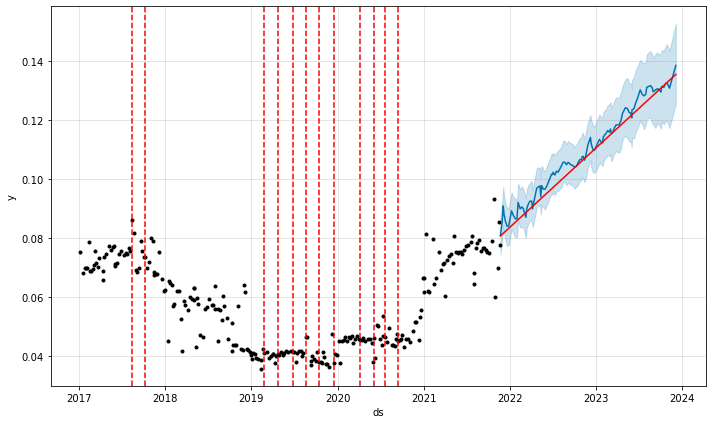

In [15]:
forecast = m.predict(df_test.drop(columns="y"))
#prop only uses weekly seasonlity, and change points for first 80%

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [17]:
forecast.to_csv(r'C:\Users\prernagupta\Desktop\jeans-bf\jeans-bf-multi.csv')

In [92]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
from prophet.diagnostics import performance_metrics



INFO:prophet:Making 4 forecasts with cutoffs between 2019-06-01 00:00:00 and 2020-11-22 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

In [93]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,0.000042,0.006449,0.004714,0.101651,0.062238,0.107529,0.60
1,39 days,0.000049,0.007002,0.005288,0.114644,0.082402,0.122645,0.55
2,41 days,0.000062,0.007863,0.005906,0.122533,0.082402,0.132877,0.50
3,42 days,0.000083,0.009101,0.006794,0.135271,0.105082,0.148563,0.45
4,44 days,0.000082,0.009059,0.006680,0.133401,0.105082,0.145565,0.45


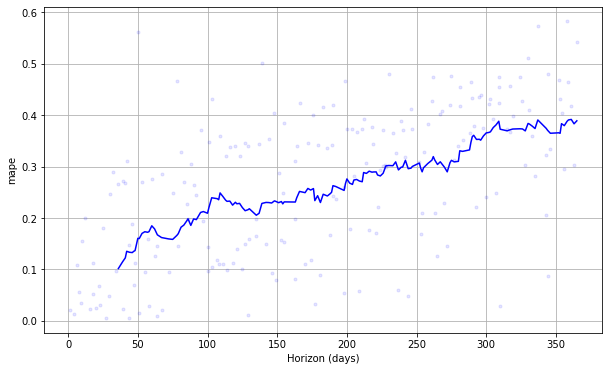

In [94]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
